**Machine Learning, caso de estudio Monopoly/Dormammu**

# **Fase I. Business Understanding.**

El banco "Monopoly" fue adquirido recientemente por el banco, con capitales extranjeros, "Dormammu". Éste encargó hacer estudios sobre la adquisición, determinando  comportamiento, patrones y una estrategia para abordar a los nuevos clientes.

En este nuevo estudio debemos presentar un análisis mediante aprendizaje supervisado considerando nuestro target, seleccionando el modelo que presente mejores resultados en predicción y mayor ajuste con los datos de entrenamiento, testeado en un set de pruebas o de validación y que su selección sea respaldada y justificada.

Dicho lo anterior el target seleccionado es el siguiente: 

*   Objetivo: Para este nuevo obejetivo determinaremos si el cliente pagará toda la deuda o solamente el mínimo es decir seguirá quedando con deuda. 

*   Columna Target = "target"


# **Fase II. Data Understanding.**

> A continuación, se importan las librerías a utilizar.

In [ ]:
#Librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Preprocesamiento
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
#Imputación
from sklearn.impute import KNNImputer
#Estandarización
from sklearn.preprocessing import StandardScaler
#Normalización
from sklearn.preprocessing import MinMaxScaler
#Modelos Y Métricas
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


> Carga de Base de datos a través de Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
sheetname = 'Transición de Negocio'
path_to_file = '/gdrive/MyDrive/DUOC/2021 - 2/MLY/Entrega2/Base_clientes_Monopoly.xlsx'
df = pd.read_excel(path_to_file, sheet_name=sheetname, header=1)

In [ ]:
df

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,...,FlgActCOL_T01,Fac_T01,Txs_T01,FacCN_T01,TxsCN_T01,FacCI_T01,TxsCI_T01,FacAN_T01,TxsAN_T01,FacAI_T01,TxsAI_T01,FacPAT_T01,TxsPAT_T01,FacCCPC_T01,TxsCCPC_T01,FacCCOT_T01,TxsCCOT_T01,FacCOL_T01,TxsCOL_T01,FacDebCom_T01,TxsDebCom_T01,FacDebAtm_T01,TxsDebAtm_T01,Col_T01,ColL1T0_T01,ColL1TE_T01,ColL2T0_T01,ColL2AC_T01,ColL2CC_T01,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,0,1,0,0,1,NaN,1,3,798000,1012000.0,1210.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,55490.0,3.0,55490.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,204133,28,24000,2,1069735.0,0,1040339.0,0,0,29396,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,0,1,0,1,0,NaN,1,1,750000,150000.0,1000.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19813.0,1.0,19813.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,118247,1,118247,1,0,0,0,0,0,0,0,0,118247,1,0,0,0,0,0,0,0,0,211884.0,0,162939.0,48945,0,0,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,0,1,0,1,1,1.0,1,2,1350000,200000.0,1500.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123950.0,3.0,123950.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,191336,3,191336,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,162161,9,519000,11,7400.0,7400,0.0,0,0,0,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,1,0,0,0,0,1.0,1,2,1570800,220001.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,44470.0,3.0,44470.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,11890,1,11890,1,0,0,0,0,0,0,0,0,11890,1,0,0,0,0,0,0,0,0,262160.0,0,244048.0,18112,0,0,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,0,1,0,1,0,1.0,2,3,2762000,2.0,6430.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,138225.0,6.0,138225.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,173576,10,173576,10,0,0,0,0,0,0,0,0,70808,3,47000,1,0,0,0,0,0,0,306161.0,60008,0.0,214125,0,32028,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,H,13.0,51,364978.0,57,1,1,1,0,1,0,0,1,1.0,2,3,999000,1000.0,550.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,78520.0,9.0,78520.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,62808,5,62808,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1112000,14,463255.0,62808,379646.0,20801,0,0,0.0,300000,0.0,478320.0,0.0,478320.0,12668,0.0,R,0,NaN
51120,51121,170,H,13.0,51,625376.0,39,1,0,0,0,1,0,0,1,1.0,1,1,1744200,1.0,300.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6824.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,37783,1,0,0,0,0,0,0,0,0,37783,1,0,0,0,0,0,0,0,0,0,0,728406.0,37783,0.0,91896,0,598727,0.0,166098,0.0,166098.0,0.0,0.0,572363,0.0,R,0,NaN
51121,51122,160,H,13.0,47,806220.0,153,1,1,0,0,1,0,0,1,1.0,1,2,1061000,194700.0,1526.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66040.0,3.0,66040.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24373.0,0,24.0,0,0,24349,0.0,18891,0.0,9652.0,0.0,9652.0,16241,0.0,R,0,NaN
51122,51123,160,M,13.0,47,NaN,11,1,0,0,0,1,0,0,0,NaN,1,1,1612000,300000.0,2300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,108982,2,108982,2,0,0,0,0,0,0,0,0,84982,1,0,0,0,0,0,0,0,0,52360.0,24000,33.0,28327,0,0,0.0,26528,0.0,24638.0,0.0,24638.0,84982,0.0,R,0,NaN


**Como sabemos los datos corresponden a un excel con actividad financiera de clientes del banco Monopoly, contiene una muestra de clientes con 12 meses de información almacenada en variables mensuales por cada cliente.**

In [ ]:
#
print("Cantidad de observaciones: ", df.shape[0])
print("Cantidad de columnas:      ", df.shape[1])
print("Cantidad de datos:         ", df.shape[0] * df.shape[1])
observaciones = df.shape[0]

Cantidad de observaciones:  51124
Cantidad de columnas:       575
Cantidad de datos:          29396300


**Estamos frente un dataset grande superando los 29 millones de datos u observaciones. Pero como se mencionó, más adelante estaremos separando la data y quedándonos solo con lo que nos interesa y consideramos pertiente, por lo que es probable que ese número total disminuya en buena medida.**

In [ ]:
df.dtypes

Id                int64
Subsegmento       int64
Sexo             object
Region          float64
Edad              int64
                 ...   
UsoL2_T01         int64
UsoLI_T01       float64
IndRev_T01       object
target            int64
Unnamed: 574    float64
Length: 575, dtype: object

**Al revisar los tipos de datos vemos que si hay ciertos datos que  son de tipo object y estos podrán ocacionarnos algún error, por lo que más adelante los estaremos transformando con OneHotEncoder.**

In [ ]:
df.describe()

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,...,FlgActCCOT_T01,FlgActCOL_T01,Fac_T01,Txs_T01,FacCN_T01,TxsCN_T01,FacCI_T01,TxsCI_T01,FacAN_T01,TxsAN_T01,FacAI_T01,TxsAI_T01,FacPAT_T01,TxsPAT_T01,FacCCPC_T01,TxsCCPC_T01,FacCCOT_T01,TxsCCOT_T01,FacCOL_T01,TxsCOL_T01,FacDebCom_T01,TxsDebCom_T01,FacDebAtm_T01,TxsDebAtm_T01,Col_T01,ColL1T0_T01,ColL1TE_T01,ColL2T0_T01,ColL2AC_T01,ColL2CC_T01,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,target,Unnamed: 574
count,51124.000000,51124.000000,51071.000000,51124.000000,3.775900e+04,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,31736.0,51124.000000,51124.000000,5.112400e+04,5.112400e+04,51124.000000,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,4.287300e+04,42873.000000,4.287300e+04,42873.000000,4.287300e+04,42873.000000,4.287300e+04,42873.000000,42873.000000,42873.000000,4.287300e+04,...,51124.000000,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,51124.000000,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,51124.000000,5.112400e+04,5.112400e+04,51124.000000,51124.000000,0.0
mean,25562.500000,182.024274,10.828220,38.702879,6.630771e+05,38.896154,0.684199,0.256181,0.381347,0.063141,0.925260,0.000900,0.137548,0.875284,1.0,1.407206,1.732376,1.133187e+06,3.283759e+05,1400.320047,0.659156,0.582068,0.033728,0.023045,0.002612,0.139435,0.277727,0.107667,0.003172,6.732317e+04,2.586850,5.687099e+04,2.224477,4.060128e+03,0.096284,1.724188e+03,0.032095,373.337824,0.005178,4.294533e+03,...,0.104413,0.003032,7.097639e+04,2.539355,5.920637e+04,2.161411,5.069743e+03,0.119846,2.333281e+03,0.047747,4.146368e+02,0.005007,3952.363821,0.205344,2.128750e+04,0.532470,1.229411e+04,0.133773,5.258277e+03,0.003091,6.967501e+04,4.755927,2.306400e+05,5.686136,3.015690e+05,2.986573e+04,1.207488e+05,3.368847e+04,6.786262e+04,4.416549e+04,5.237914e+03,7.637553e+04,1.734930e+03,1.939488e+05,7.323155,1.840923e+05,1.360327e+05,8.294372,0.089977,NaN
std,14758.371918,29.276596,3.392703,13.302573,4.092795e+05,35.672549,0.464839,0.436527,0.485722,0.243218,0.262974,0.029983,0.344428,0.330400,0.0,0.550357,0.877470,1.076922e+06,7.578185e+05,1597.344457,0.473998,0.493225,0.180529,0.150048,0.051045,0.346404,0.447883,0.309963,0.056233,1.248339e+05,3.746252,1.104570e+05,3.573449,4.297850e+04,0.815828,2.177396e+04,0.258366,10719.708366,0.145439,2.100321e+04,...,0.305798,0.054979,1.345565e+05,3.707367,1.175587e+05,3.521555,5.244459e+04,0.955300,2.348929e+04,0.342654,1.274503e+04,0.133617,20470.723940,0.651335,7.136115e+04,1.203759,1.259857e+05,0.448993,1.243488e+05,0.056554,1.556583e+05,9.147662,3.644859e+05,7.739201,5.222979e+05,7.673128e+04,2.614987e+05,8.167984e+04,4.224672e+05,1.081146e+05,4.852871e+04,1.490256e+05,4.235368e+04,2.884980e+05,108.161194,2.891731e+05,4.325389e+05,113.215624,0.286152,NaN
min,1.000000,151.000000,1.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.800000e+05,-2.000000,-4.800000e+05,-2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...

**La función describe nos permite ver la información estadistica de nuestro dataset. Debido a la gran cantidad de columnas (575) no se puede determinar a simple vista algún patrón en los datos.**

**Se utilizará la descripción del dataset para obtener más información.**

In [ ]:
vista_general = df.describe()

In [ ]:
vista_general = vista_general.transpose() #se utiliza la transpuesta para obtener los features como filas con el fin de gráficar

In [ ]:
vista_general

,count,mean,std,min,25%,50%,75%,max
Id,51124.0,25562.500000,14758.371918,1.00,12781.75,25562.5,38343.25,51124.00
Subsegmento,51124.0,182.024274,29.276596,151.00,160.00,170.0,210.00,959.00
Region,51071.0,10.828220,3.392703,1.00,9.00,13.0,13.00,13.00
Edad,51124.0,38.702879,13.302573,9.00,28.00,35.0,46.00,104.00
Renta,37759.0,663077.078726,409279.460268,1.00,419999.00,567012.0,814903.50,13089327.00
...,...,...,...,...,...,...,...,...
UsoL1_T01,51124.0,184092.343547,289173.134339,-3763996.60,17707.50,81129.0,227814.50,6911556.00
UsoL2_T01,51124.0,136032.715750,432538.882162,-4.00,0.00,29646.5,102102.25,11785487.00
UsoLI_T01,51124.0,8.294372,113.215624,-7785.12,0.00,0.0,0.00,3929.81
target,51124.0,0.089977,0.286152,0.00,0.00,0.0,0.00,1.00


In [ ]:
vista_general.index

Index(['Id', 'Subsegmento', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad', 'Monoproducto',
       ...
       'ColMx_T01', 'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01',
       'UsoL1_T01', 'UsoL2_T01', 'UsoLI_T01', 'target', 'Unnamed: 574'],
      dtype='object', length=562)

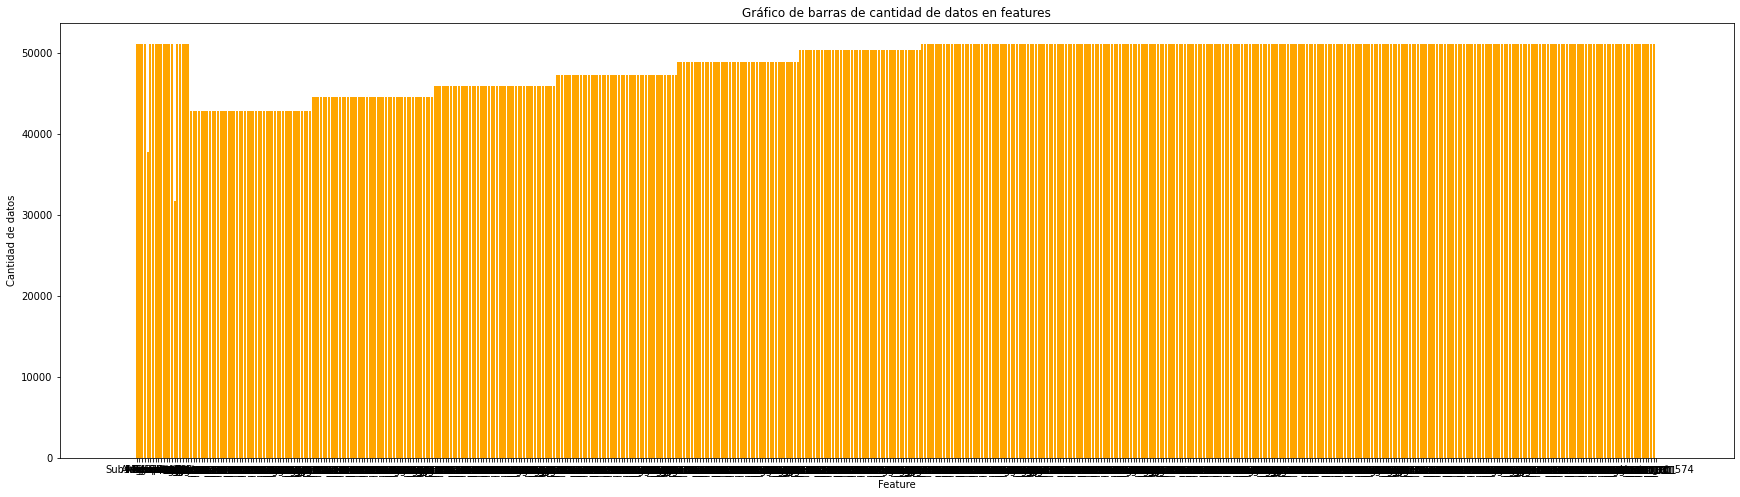

In [ ]:
plt.figure(figsize=(30,8))
plt.bar(vista_general.index,vista_general["count"], color="orange")
plt.xlabel('Feature')
plt.ylabel('Cantidad de datos')
plt.title('Gráfico de barras de cantidad de datos en features')
plt.show()

**Cada barra pertenenciente al plot indica la cantidad de datos que hay en cada feature. Debido a la cantidad de columnas se pierde la información sobre cual barra es cual, pero a modo general, se puede decir que visualmente, al menos un 40% de los features tiene uno o más missing values y estos se agrupan en su mayoría en los primeros 6 meses. Esto se puede inferir de acuerdo al orden de plotteo de features y que estos ya vienen en orden temporal.**

In [ ]:
df.isnull().sum()

Id                  0
Subsegmento         0
Sexo                1
Region             53
Edad                0
                ...  
UsoL2_T01           0
UsoLI_T01           0
IndRev_T01          0
target              0
Unnamed: 574    51124
Length: 575, dtype: int64

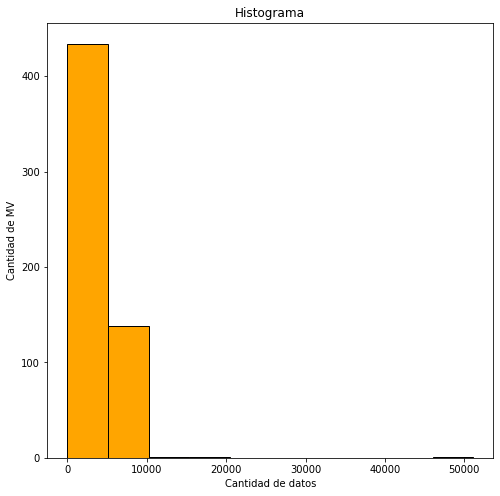

In [ ]:
y = df.isna().sum()
num_bins = 10
plt.figure(figsize=(8,8))
plt.hist(y, num_bins, color="orange" , edgecolor='black')
plt.xlabel('Cantidad de datos')
plt.ylabel('Cantidad de MV')
plt.title('Histograma')
plt.show()

**Vemos que hay una gran número de filas con datos nulos en nuestro dataset, sin embargo hay una cantidad importante también de columnas las cuales no tienen datos nulos, por lo que más adelante estaremos separando la data y se curará para quedarnos con la menor cantidad de datos nulos, para no tener que "inventar" data aplicando imputación.**


**Visualizando la distribución de mínimos y máximos de cada feature:**

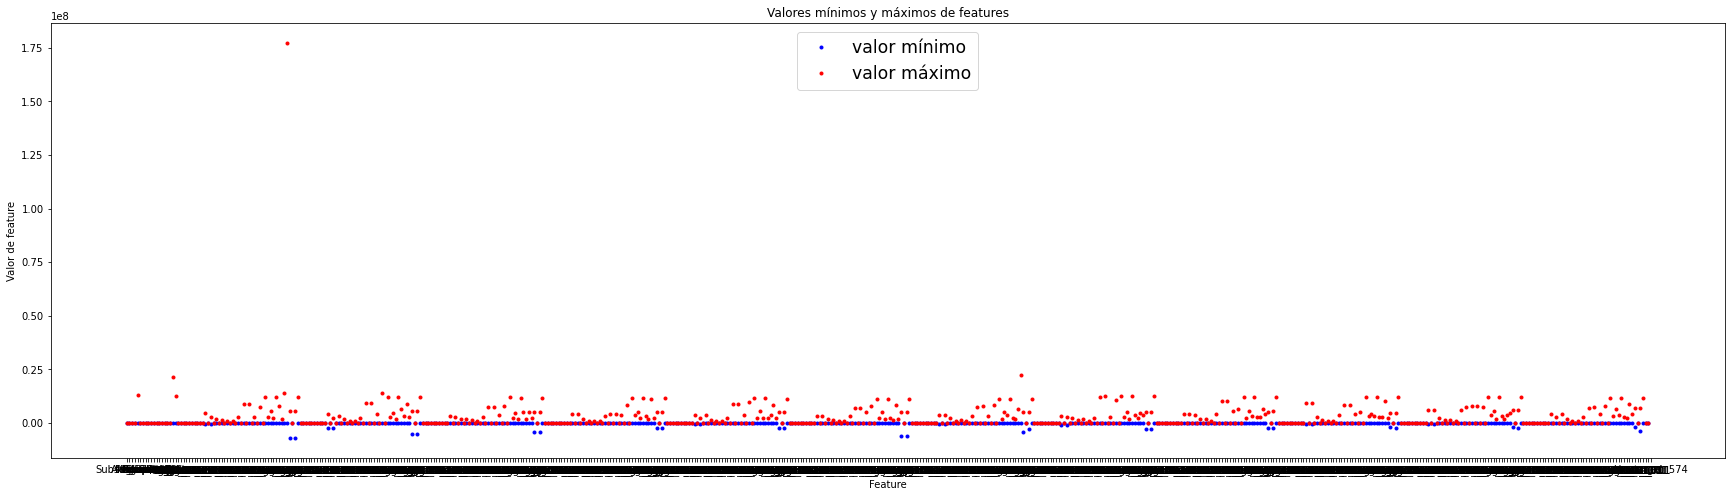

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(vista_general.index, vista_general["min"], 'b.', label='valor mínimo')
plt.plot(vista_general.index, vista_general["max"], 'r.', label='valor máximo')
plt.xlabel('Feature')
plt.ylabel('Valor de feature')
plt.title('Valores mínimos y máximos de features')
plt.legend(loc='upper center', fontsize='xx-large')
plt.show()

**Primero es importante notar que la escala vertical está en el orden de $10^{8}$, por lo que la diferencia entre y=0 e y=1.75 aprox. es del orden de 175.000.000. Para el general de datos, el rango está entre 0 y 25.000.000, pero al mismo tiempo no se aprecian otros máximos por lo que se puede inferir que son de escala mucho menor. Se deberá realizar un escalamiento o estandarización de datos.**

**Es apreciable visualmente la separación entre meses, contando 12 "mini patrones" en el gráfico.**

# **Fase III. Data Preparation**



Comenzamos a revisar los datos y darnos cuenta de lo que será útil y lo que no para más adelante.


In [ ]:
df.columns

Index(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad',
       ...
       'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01', 'UsoL1_T01',
       'UsoL2_T01', 'UsoLI_T01', 'IndRev_T01', 'target', 'Unnamed: 574'],
      dtype='object', length=575)

Al ver el excel, existe una suma que da cuenta de la cantidad de columnas y que está en la misma altura que los headers de las columnas, por lo que se eliminará al no aportar valor está columna está denonimada "Unnamed"

In [ ]:
#Usamos la función drop para eliminar la columna anteriormente mencionada
df = df.drop(columns=['Unnamed: 574'])

### Aplicando OneHotEnconder



> Con los aprendizajes del análisis anterior, en primera instancia despejamos los valores no numéricos usando OneHotEncoder



In [ ]:
df_0 = df.copy()
cols_a_cambiar = []
helper_0 = df_0.dtypes.to_frame()
helper_0 = helper_0.rename({0:'values'}, axis=1)

In [ ]:
helper_0[helper_0.values == 'object']

,values
Sexo,object
IndRev_T12,object
IndRev_T11,object
IndRev_T10,object
IndRev_T09,object
IndRev_T08,object
IndRev_T07,object
IndRev_T06,object
IndRev_T05,object
IndRev_T04,object


In [ ]:
helper_0[helper_0.values == 'object'].index

Index(['Sexo', 'IndRev_T12', 'IndRev_T11', 'IndRev_T10', 'IndRev_T09',
       'IndRev_T08', 'IndRev_T07', 'IndRev_T06', 'IndRev_T05', 'IndRev_T04',
       'IndRev_T03', 'IndRev_T02', 'IndRev_T01'],
      dtype='object')

In [ ]:
print(df_0[helper_0[helper_0.values == 'object'].index].Sexo.unique())
print(df_0[helper_0[helper_0.values == 'object'].index].IndRev_T12.unique())
print(df_0[helper_0[helper_0.values == 'object'].index].IndRev_T11.unique())
print(df_0[helper_0[helper_0.values == 'object'].index].IndRev_T10.unique())
print(df_0[helper_0[helper_0.values == 'object'].index].IndRev_T09.unique())
print(df_0[helper_0[helper_0.values == 'object'].index].IndRev_T08.unique())
print(df_0[helper_0[helper_0.values == 'object'].index].IndRev_T12.unique())
print(df_0[helper_0[helper_0.values == 'object'].index].IndRev_T07.unique())
print(df_0[helper_0[helper_0.values == 'object'].index].IndRev_T06.unique())
print(df_0[helper_0[helper_0.values == 'object'].index].IndRev_T05.unique())
print(df_0[helper_0[helper_0.values == 'object'].index].IndRev_T04.unique())
print(df_0[helper_0[helper_0.values == 'object'].index].IndRev_T03.unique())
print(df_0[helper_0[helper_0.values == 'object'].index].IndRev_T02.unique())
print(df_0[helper_0[helper_0.values == 'object'].index].IndRev_T01.unique())

['M' 'H' nan]
['R' 'T' 'P' nan]
['R' 'T' 'P' nan]
['R' 'T' nan 'P']
['R' 'T' 'P' nan]
['R' 'T' 'P' nan]
['R' 'T' 'P' nan]
['R' 'T' 'P' nan]
['R' 'T' 'P' nan]
['R' 'T' 'P' nan]
['R' 'T' 'P' nan]
['R' 'T' 'P' nan]
['R' 'T' 'P' nan]
['R' 'T' 'P']




> Para los valores categóricos se contaron los MV



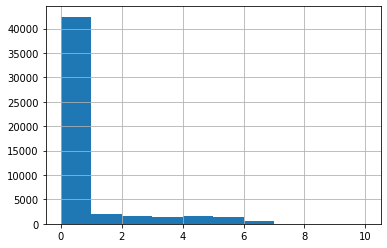

In [ ]:
df_0[['Sexo',
 'IndRev_T12',
 'IndRev_T11',
 'IndRev_T10',
 'IndRev_T09',
 'IndRev_T08',
 'IndRev_T07',
 'IndRev_T06',
 'IndRev_T05',
 'IndRev_T04',
 'IndRev_T03',
 'IndRev_T02',
 'IndRev_T01']].isna().sum(axis=1).hist()

In [ ]:
s = df_0[['Sexo',
 'IndRev_T12',
 'IndRev_T11',
 'IndRev_T10',
 'IndRev_T09',
 'IndRev_T08',
 'IndRev_T07',
 'IndRev_T06',
 'IndRev_T05',
 'IndRev_T04',
 'IndRev_T03',
 'IndRev_T02',
 'IndRev_T01']].isna().sum(axis=1)
agrupados = s.groupby(s)
agrupados = agrupados.size().to_frame()
agrupados = agrupados.rename({0:'values'}, axis=1)
agrupados

,values
0,42422
1,2029
2,1543
3,1442
4,1622
5,1371
6,656
7,22
8,9
9,5


In [ ]:
agrupados['suma_acumulativa'] = agrupados['values'].cumsum()
agrupados['precentil_acumulativo'] = round(100*agrupados['suma_acumulativa']/agrupados['values'].sum(),3)
agrupados

,values,suma_acumulativa,precentil_acumulativo
0,42422,42422,82.979
1,2029,44451,86.947
2,1543,45994,89.966
3,1442,47436,92.786
4,1622,49058,95.959
5,1371,50429,98.641
6,656,51085,99.924
7,22,51107,99.967
8,9,51116,99.984
9,5,51121,99.994


> Con el objetivo de imputar la menor cantidad de data posible al mismo tiempo que se mantiene la cantidad de datos, se decidió por cortar y continuar usando todas las observaciones que tuviesen hasta 1 MV en algunas de las columnas categóricas, lo que conserva el 86.947% de los datos originales.

In [ ]:
limpiar_0 = df_0[['Sexo',
 'IndRev_T12',
 'IndRev_T11',
 'IndRev_T10',
 'IndRev_T09',
 'IndRev_T08',
 'IndRev_T07',
 'IndRev_T06',
 'IndRev_T05',
 'IndRev_T04',
 'IndRev_T03',
 'IndRev_T02',
 'IndRev_T01']].isna().sum(axis=1).to_frame()
limpiar_0 = limpiar_0.rename({0:'values'}, axis=1)
df_0.drop(limpiar_0[limpiar_0.values > 2].index, inplace=True)

In [ ]:
df_0

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,...,FlgActCCOT_T01,FlgActCOL_T01,Fac_T01,Txs_T01,FacCN_T01,TxsCN_T01,FacCI_T01,TxsCI_T01,FacAN_T01,TxsAN_T01,FacAI_T01,TxsAI_T01,FacPAT_T01,TxsPAT_T01,FacCCPC_T01,TxsCCPC_T01,FacCCOT_T01,TxsCCOT_T01,FacCOL_T01,TxsCOL_T01,FacDebCom_T01,TxsDebCom_T01,FacDebAtm_T01,TxsDebAtm_T01,Col_T01,ColL1T0_T01,ColL1TE_T01,ColL2T0_T01,ColL2AC_T01,ColL2CC_T01,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,0,1,0,0,1,NaN,1,3,798000,1012000.0,1210.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,55490.0,3.0,55490.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,204133,28,24000,2,1069735.0,0,1040339.0,0,0,29396,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,0,1,0,1,0,NaN,1,1,750000,150000.0,1000.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19813.0,1.0,19813.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,118247,1,118247,1,0,0,0,0,0,0,0,0,118247,1,0,0,0,0,0,0,0,0,211884.0,0,162939.0,48945,0,0,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,0,1,0,1,1,1.0,1,2,1350000,200000.0,1500.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123950.0,3.0,123950.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,191336,3,191336,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,162161,9,519000,11,7400.0,7400,0.0,0,0,0,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,1,0,0,0,0,1.0,1,2,1570800,220001.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,44470.0,3.0,44470.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,11890,1,11890,1,0,0,0,0,0,0,0,0,11890,1,0,0,0,0,0,0,0,0,262160.0,0,244048.0,18112,0,0,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,0,1,0,1,0,1.0,2,3,2762000,2.0,6430.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,138225.0,6.0,138225.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,173576,10,173576,10,0,0,0,0,0,0,0,0,70808,3,47000,1,0,0,0,0,0,0,306161.0,60008,0.0,214125,0,32028,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,H,13.0,51,364978.0,57,1,1,1,0,1,0,0,1,1.0,2,3,999000,1000.0,550.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,78520.0,9.0,78520.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,62808,5,62808,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1112000,14,463255.0,62808,379646.0,20801,0,0,0.0,300000,0.0,478320.0,0.0,478320.0,12668,0.0,R,0
51120,51121,170,H,13.0,51,625376.0,39,1,0,0,0,1,0,0,1,1.0,1,1,1744200,1.0,300.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6824.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,37783,1,0,0,0,0,0,0,0,0,37783,1,0,0,0,0,0,0,0,0,0,0,728406.0,37783,0.0,91896,0,598727,0.0,166098,0.0,166098.0,0.0,0.0,572363,0.0,R,0
51121,51122,160,H,13.0,47,806220.0,153,1,1,0,0,1,0,0,1,1.0,1,2,1061000,194700.0,1526.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66040.0,3.0,66040.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24373.0,0,24.0,0,0,24349,0.0,18891,0.0,9652.0,0.0,9652.0,16241,0.0,R,0
51122,51123,160,M,13.0,47,NaN,11,1,0,0,0,1,0,0,0,NaN,1,1,1612000,300000.0,2300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,108982,2,108982,2,0,0,0,0,0,0,0,0,84982,1,0,0,0,0,0,0,0,0,52360.0,24000,33.0,28327,0,0,0.0,26528,0.0,24638.0,0.0,24638.0,84982,0.0,R,0


> Se prepararán los categóricos usando OneHotEncoder

In [ ]:
enc = OneHotEncoder()
data_encoder = enc.fit_transform(df_0[['Sexo',
 'IndRev_T12',
 'IndRev_T11',
 'IndRev_T10',
 'IndRev_T09',
 'IndRev_T08',
 'IndRev_T07',
 'IndRev_T06',
 'IndRev_T05',
 'IndRev_T04',
 'IndRev_T03',
 'IndRev_T02',
 'IndRev_T01']])
dat = data_encoder.toarray()

In [ ]:
enc.get_feature_names_out()

array(['Sexo_H', 'Sexo_M', 'IndRev_T12_P', 'IndRev_T12_R', 'IndRev_T12_T',
       'IndRev_T12_nan', 'IndRev_T11_P', 'IndRev_T11_R', 'IndRev_T11_T',
       'IndRev_T11_nan', 'IndRev_T10_P', 'IndRev_T10_R', 'IndRev_T10_T',
       'IndRev_T10_nan', 'IndRev_T09_P', 'IndRev_T09_R', 'IndRev_T09_T',
       'IndRev_T09_nan', 'IndRev_T08_P', 'IndRev_T08_R', 'IndRev_T08_T',
       'IndRev_T08_nan', 'IndRev_T07_P', 'IndRev_T07_R', 'IndRev_T07_T',
       'IndRev_T07_nan', 'IndRev_T06_P', 'IndRev_T06_R', 'IndRev_T06_T',
       'IndRev_T06_nan', 'IndRev_T05_P', 'IndRev_T05_R', 'IndRev_T05_T',
       'IndRev_T05_nan', 'IndRev_T04_P', 'IndRev_T04_R', 'IndRev_T04_T',
       'IndRev_T04_nan', 'IndRev_T03_P', 'IndRev_T03_R', 'IndRev_T03_T',
       'IndRev_T03_nan', 'IndRev_T02_P', 'IndRev_T02_R', 'IndRev_T02_T',
       'IndRev_T02_nan', 'IndRev_T01_P', 'IndRev_T01_R', 'IndRev_T01_T'],
      dtype=object)

> Se obtiene un dataframe con los datos encodeados.

In [ ]:
df_enc = pd.DataFrame(dat, columns=enc.get_feature_names_out())
df_enc

,Sexo_H,Sexo_M,IndRev_T12_P,IndRev_T12_R,IndRev_T12_T,IndRev_T12_nan,IndRev_T11_P,IndRev_T11_R,IndRev_T11_T,IndRev_T11_nan,IndRev_T10_P,IndRev_T10_R,IndRev_T10_T,IndRev_T10_nan,IndRev_T09_P,IndRev_T09_R,IndRev_T09_T,IndRev_T09_nan,IndRev_T08_P,IndRev_T08_R,IndRev_T08_T,IndRev_T08_nan,IndRev_T07_P,IndRev_T07_R,IndRev_T07_T,IndRev_T07_nan,IndRev_T06_P,IndRev_T06_R,IndRev_T06_T,IndRev_T06_nan,IndRev_T05_P,IndRev_T05_R,IndRev_T05_T,IndRev_T05_nan,IndRev_T04_P,IndRev_T04_R,IndRev_T04_T,IndRev_T04_nan,IndRev_T03_P,IndRev_T03_R,IndRev_T03_T,IndRev_T03_nan,IndRev_T02_P,IndRev_T02_R,IndRev_T02_T,IndRev_T02_nan,IndRev_T01_P,IndRev_T01_R,IndRev_T01_T
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45989,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45990,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45991,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45992,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_0 = df_0.reset_index()
df_0 = df_0.join(df_enc)
df_0 = df_0.drop(columns=['Id', 'Sexo'])
df_0

,index,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,...,IndRev_T11_nan,IndRev_T10_P,IndRev_T10_R,IndRev_T10_T,IndRev_T10_nan,IndRev_T09_P,IndRev_T09_R,IndRev_T09_T,IndRev_T09_nan,IndRev_T08_P,IndRev_T08_R,IndRev_T08_T,IndRev_T08_nan,IndRev_T07_P,IndRev_T07_R,IndRev_T07_T,IndRev_T07_nan,IndRev_T06_P,IndRev_T06_R,IndRev_T06_T,IndRev_T06_nan,IndRev_T05_P,IndRev_T05_R,IndRev_T05_T,IndRev_T05_nan,IndRev_T04_P,IndRev_T04_R,IndRev_T04_T,IndRev_T04_nan,IndRev_T03_P,IndRev_T03_R,IndRev_T03_T,IndRev_T03_nan,IndRev_T02_P,IndRev_T02_R,IndRev_T02_T,IndRev_T02_nan,IndRev_T01_P,IndRev_T01_R,IndRev_T01_T
0,0,160,13.0,43,NaN,130,1,1,0,0,1,0,0,1,NaN,1,3,798000,1012000.0,1210.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,55490.0,3.0,55490.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,160,13.0,46,143640.0,69,1,0,0,0,1,0,1,0,NaN,1,1,750000,150000.0,1000.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19813.0,1.0,19813.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,170,13.0,45,929106.0,24,1,1,0,0,1,0,1,1,1.0,1,2,1350000,200000.0,1500.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123950.0,3.0,123950.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,151,13.0,46,172447.0,134,0,1,0,1,0,0,0,0,1.0,1,2,1570800,220001.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,44470.0,3.0,44470.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,170,13.0,46,805250.0,116,0,1,1,0,1,0,1,0,1.0,2,3,2762000,2.0,6430.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,138225.0,6.0,138225.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45989,51119,160,13.0,51,364978.0,57,1,1,1,0,1,0,0,1,1.0,2,3,999000,1000.0,550.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,78520.0,9.0,78520.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45990,51120,170,13.0,51,625376.0,39,1,0,0,0,1,0,0,1,1.0,1,1,1744200,1.0,300.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6824.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6824.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45991,51121,160,13.0,47,806220.0,153,1,1,0,0,1,0,0,1,1.0,1,2,1061000,194700.0,1526.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66040.0,3.0,66040.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45992,51122,160,13.0,47,NaN,11,1,0,0,0,1,0,0,0,NaN,1,1,1612000,300000.0,2300.0,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
df_0.drop(columns=["index"], inplace=True)


> Se eliminan los features sin el encoding.

In [ ]:
df_0.drop(columns=['IndRev_T12',
 'IndRev_T11',
 'IndRev_T10',
 'IndRev_T09',
 'IndRev_T08',
 'IndRev_T07',
 'IndRev_T06',
 'IndRev_T05',
 'IndRev_T04',
 'IndRev_T03',
 'IndRev_T02',
 'IndRev_T01'])
df_0.dtypes

Subsegmento         int64
Region            float64
Edad                int64
Renta             float64
Antiguedad          int64
                   ...   
IndRev_T02_T      float64
IndRev_T02_nan    float64
IndRev_T01_P      float64
IndRev_T01_R      float64
IndRev_T01_T      float64
Length: 621, dtype: object

> Se utiliza KNN Imputer para el imputado de datos

In [ ]:
knn_imputer_0 = KNNImputer(n_neighbors=4, weights="uniform")
df_0[enc.get_feature_names_out()] = knn_imputer_0.fit_transform(df_0[enc.get_feature_names_out()])

In [ ]:
df_0

,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,TxsPAT_T12,...,IndRev_T11_nan,IndRev_T10_P,IndRev_T10_R,IndRev_T10_T,IndRev_T10_nan,IndRev_T09_P,IndRev_T09_R,IndRev_T09_T,IndRev_T09_nan,IndRev_T08_P,IndRev_T08_R,IndRev_T08_T,IndRev_T08_nan,IndRev_T07_P,IndRev_T07_R,IndRev_T07_T,IndRev_T07_nan,IndRev_T06_P,IndRev_T06_R,IndRev_T06_T,IndRev_T06_nan,IndRev_T05_P,IndRev_T05_R,IndRev_T05_T,IndRev_T05_nan,IndRev_T04_P,IndRev_T04_R,IndRev_T04_T,IndRev_T04_nan,IndRev_T03_P,IndRev_T03_R,IndRev_T03_T,IndRev_T03_nan,IndRev_T02_P,IndRev_T02_R,IndRev_T02_T,IndRev_T02_nan,IndRev_T01_P,IndRev_T01_R,IndRev_T01_T
0,160,13.0,43,NaN,130,1,1,0,0,1,0,0,1,NaN,1,3,798000,1012000.0,1210.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,55490.0,3.0,55490.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,160,13.0,46,143640.0,69,1,0,0,0,1,0,1,0,NaN,1,1,750000,150000.0,1000.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19813.0,1.0,19813.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,170,13.0,45,929106.0,24,1,1,0,0,1,0,1,1,1.0,1,2,1350000,200000.0,1500.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123950.0,3.0,123950.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,151,13.0,46,172447.0,134,0,1,0,1,0,0,0,0,1.0,1,2,1570800,220001.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,44470.0,3.0,44470.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,170,13.0,46,805250.0,116,0,1,1,0,1,0,1,0,1.0,2,3,2762000,2.0,6430.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,138225.0,6.0,138225.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45989,160,13.0,51,364978.0,57,1,1,1,0,1,0,0,1,1.0,2,3,999000,1000.0,550.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,78520.0,9.0,78520.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45990,170,13.0,51,625376.0,39,1,0,0,0,1,0,0,1,1.0,1,1,1744200,1.0,300.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6824.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6824.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45991,160,13.0,47,806220.0,153,1,1,0,0,1,0,0,1,1.0,1,2,1061000,194700.0,1526.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66040.0,3.0,66040.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45992,160,13.0,47,NaN,11,1,0,0,0,1,0,0,0,NaN,1,1,1612000,300000.0,2300.0,NaN,NaN,NaN,NaN,Na

## Matriz de correlación


In [ ]:
corrdat = df_0.corr()

def getCorr(dat, lim): #Obtiene los features con mayor impacto en el target
    feature = []
    valor = []
    
    for i , index in enumerate(dat.index): #Bucle para todos los índices
        if abs(dat[index]) > lim:
            feature.append(index)
            print(index)
            valor.append(dat[index])

    df = pd.DataFrame(data = valor, index = feature, columns = ['corr value'])

    return df

In [ ]:
lim = 0.1
corr_value = getCorr(corrdat['target'], lim)

Internauta
ColL1TE_T09
EeccNac_T09
UsoL1_T09
Col_T08
ColL1TE_T08
EeccNac_T08
UsoL1_T08
TxsDebAtm_T07
Col_T07
ColL1TE_T07
EeccNac_T07
UsoL1_T07
FlgAct_T06
FlgActCN_T06
FlgActCCPC_T06
Txs_T06
FacCN_T06
TxsCN_T06
TxsDebAtm_T06
Col_T06
ColL1TE_T06
EeccNac_T06
UsoL1_T06
FlgAct_T05
FlgActCN_T05
FlgActCCPC_T05
Txs_T05
FacCN_T05
TxsCN_T05
TxsCCPC_T05
TxsDebAtm_T05
Col_T05
ColL1TE_T05
EeccNac_T05
UsoL1_T05
FlgAct_T04
FlgActCN_T04
FlgActCCPC_T04
Fac_T04
Txs_T04
FacCN_T04
TxsCN_T04
TxsCCPC_T04
TxsDebAtm_T04
Col_T04
ColL1TE_T04
ColL2T0_T04
EeccNac_T04
UsoL1_T04
FlgAct_T03
FlgActCN_T03
FlgActCCPC_T03
Fac_T03
Txs_T03
FacCN_T03
TxsCN_T03
TxsCCPC_T03
TxsDebAtm_T03
Col_T03
ColL1TE_T03
ColL2T0_T03
EeccNac_T03
UsoL1_T03
FlgAct_T02
FlgActCN_T02
FlgActCCPC_T02
Fac_T02
Txs_T02
FacCN_T02
TxsCN_T02
TxsCCPC_T02
TxsDebAtm_T02
ColL1TE_T02
ColL2T0_T02
EeccNac_T02
UsoL1_T02
FlgAct_T01
FlgActCN_T01
FlgActCCPC_T01
Fac_T01
Txs_T01
FacCN_T01
TxsCN_T01
TxsCCPC_T01
TxsDebAtm_T01
ColL1TE_T01
ColL2T0_T01
EeccNac_T01
UsoL1

In [ ]:
corr_value

,corr value
Internauta,-0.120480
ColL1TE_T09,0.113267
EeccNac_T09,0.104736
UsoL1_T09,0.109894
Col_T08,0.105174
...,...
IndRev_T03_T,-0.110799
IndRev_T02_R,0.141150
IndRev_T02_T,-0.111229
IndRev_T01_R,0.137527


> A diferencia del análisis de target anterior, ahora con un límite (bajo) de |0.1| ya tenemos 107 columnas posibles. Teniendo en cuenta de que al aplicar un límite de 0.01 en Target=PagoInt_T_12 obteníamos 6 columnas, la mejora en las métricas de las máquinas es esperable. Es importante añadir que algunas de las columnas consideradas corresponden a las que anteriormente eran categóricas y que en el primer análisis no fueron incluídas por la misma razón.

In [ ]:
corr_value.sort_values(by='corr value', key=abs, ascending=False)

,corr value
target,1.000000
FlgActCN_T02,-0.263861
FlgActCN_T03,-0.257244
FlgActCN_T01,-0.253052
FlgActCN_T04,-0.227642
...,...
TxsCCPC_T05,-0.104388
TxsDebAtm_T07,-0.104081
IndRev_T05_T,-0.103807
Col_T03,0.103608


> Se limpian los datos considerando las 100 mejores columnas según valor de correlación.

In [ ]:
df_1 = df_0[corr_value.index].copy()

In [ ]:
df_1

,Internauta,ColL1TE_T09,EeccNac_T09,UsoL1_T09,Col_T08,ColL1TE_T08,EeccNac_T08,UsoL1_T08,TxsDebAtm_T07,Col_T07,ColL1TE_T07,EeccNac_T07,UsoL1_T07,FlgAct_T06,FlgActCN_T06,FlgActCCPC_T06,Txs_T06,FacCN_T06,TxsCN_T06,TxsDebAtm_T06,Col_T06,ColL1TE_T06,EeccNac_T06,UsoL1_T06,FlgAct_T05,FlgActCN_T05,FlgActCCPC_T05,Txs_T05,FacCN_T05,TxsCN_T05,TxsCCPC_T05,TxsDebAtm_T05,Col_T05,ColL1TE_T05,EeccNac_T05,UsoL1_T05,FlgAct_T04,FlgActCN_T04,FlgActCCPC_T04,Fac_T04,...,Fac_T02,Txs_T02,FacCN_T02,TxsCN_T02,TxsCCPC_T02,TxsDebAtm_T02,ColL1TE_T02,ColL2T0_T02,EeccNac_T02,UsoL1_T02,FlgAct_T01,FlgActCN_T01,FlgActCCPC_T01,Fac_T01,Txs_T01,FacCN_T01,TxsCN_T01,TxsCCPC_T01,TxsDebAtm_T01,ColL1TE_T01,ColL2T0_T01,EeccNac_T01,UsoL1_T01,target,IndRev_T10_R,IndRev_T09_R,IndRev_T08_R,IndRev_T07_R,IndRev_T07_T,IndRev_T06_R,IndRev_T06_T,IndRev_T05_R,IndRev_T05_T,IndRev_T04_R,IndRev_T03_R,IndRev_T03_T,IndRev_T02_R,IndRev_T02_T,IndRev_T01_R,IndRev_T01_T
0,1,736179.0,788751.0,807655.00,838145.0,765134.0,827221.0,842571.0,4.0,945553.0,803069.0,878272.0,878272.0,1.0,1.0,1.0,5.0,106045.0,5.0,7.0,1042046.00,843499.0,958375.0,944115.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1039534.00,895233.0,982806.0,982806.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,1019435.0,0.0,1072040.0,1072040.00,0,0,0,0,0,0,0,0,2,1040339.0,0,1099866.0,1099866.0,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1,434170.0,769718.0,569718.00,609102.0,408757.0,531753.0,544933.0,0.0,581868.0,363060.0,689198.0,499198.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,731020.17,389810.0,507253.0,507253.00,1.0,1.0,1.0,1.0,27990.0,1.0,1.0,0.0,573811.29,355578.0,441843.0,441843.0,0.0,0.0,0.0,0.0,...,14293.0,1.0,14293.0,1.0,1.0,0.0,441135.0,4764.0,462736.0,462736.00,1,1,1,118247,1,118247,1,1,0,162939.0,48945,214592.0,214592.0,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1,0.0,0.0,5700.00,649320.0,0.0,0.0,23800.0,21.0,188824.0,0.0,2056.0,63991.0,1.0,1.0,0.0,4.0,59840.0,4.0,10.0,118173.00,0.0,5658.0,0.00,1.0,1.0,0.0,3.0,69822.0,3.0,0.0,13.0,0.00,0.0,0.0,0.0,1.0,1.0,0.0,133940.0,...,57929.0,5.0,57929.0,5.0,0.0,12.0,0.0,0.0,0.0,32740.00,1,1,0,191336,3,191336,3,0,11,0.0,0,0.0,7400.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0,315965.0,360004.0,360004.00,368094.0,300406.0,367944.0,378950.0,0.0,353439.0,323437.0,367343.0,367343.0,1.0,1.0,1.0,6.0,82462.0,6.0,0.0,353606.00,307791.0,346361.0,346361.00,1.0,1.0,1.0,2.0,22592.0,2.0,1.0,0.0,350306.00,296794.0,333006.0,352008.0,1.0,1.0,1.0,34458.0,...,7990.0,1.0,7990.0,1.0,1.0,0.0,275320.0,23169.0,303400.0,303400.00,1,1,1,11890,1,11890,1,1,0,244048.0,18112,272762.0,272762.0,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0,0.0,273153.0,112735.00,285185.0,0.0,463781.0,147131.0,0.0,274519.0,0.0,385098.0,34266.0,1.0,1.0,1.0,10.0,323687.0,10.0,0.0,229720.00,0.0,418649.0,90658.00,1.0,1.0,1.0,10.0,312172.0,10.0,4.0,0.0,209870.00,0.0,341886.0,96071.0,1.0,1.0,1.0,135979.0,...,334904.0,9.0,334904.0,9.0,4.0,0.0,0.0,183400.0,184685.0,93302.00,1,1,1,173576,10,173576,10,3,0,0.0,214125,249562.0,75339.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45989,1,437415.0,554890.0,612620.00,599447.0,490547.0,591359.0,627109.0,8.0,637088.0,512044.0,660142.0,674735.0,1.0,1.0,1.0,4.0,86550.0,4.0,10.0,586109.00,529831.0,697496.0,640992.00,1.0,1.0,1.0,7.0,54910.0,7.0,3.0,12.0,666743.00,588594.0,682980.0,730967.0,1.0,1.0,1.0,24108.0,...,44048.0,5.0,44048.0,5.0,3.0,10.0,607072.0,23698.0,679172.0,679172.00,1,1,0,62808,5,62808,5,0,14,379646.0,20801,478320.0,478320.0,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
45990,1,0.0,45711.0,0.00,9876.0,0.0,10336.0,0.0,0.0,33619.0,0.0,34078.0,3407

In [ ]:
df_1.isna().sum()

Internauta        0
ColL1TE_T09     100
EeccNac_T09     100
UsoL1_T09       100
Col_T08          97
               ... 
IndRev_T03_T      0
IndRev_T02_R      0
IndRev_T02_T      0
IndRev_T01_R      0
IndRev_T01_T      0
Length: 107, dtype: int64

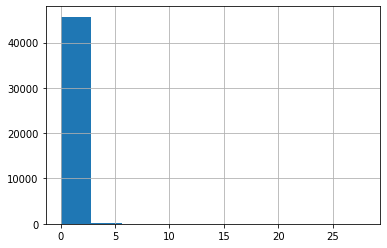

In [ ]:
df_1.isna().sum(axis=1).hist()

In [ ]:
limpiar_1 = df_1.isna().sum(axis=1).to_frame()
limpiar_1 = limpiar_1.rename({0:'values'}, axis=1)
limpiar_1

,values
0,0
1,0
2,0
3,0
4,0
...,...
45989,0
45990,0
45991,0
45992,0


In [ ]:
helper_1 = limpiar_1.groupby('values').size().to_frame()
helper_1 = helper_1.rename({0:'values_f'}, axis=1)
helper_1

,values_f
values,
0,45710
3,87
4,68
5,83
7,13
9,16
11,2
12,1
13,6


In [ ]:
helper_1['suma_acumulativa'] = helper_1['values_f'].cumsum()
helper_1

,values_f,suma_acumulativa
values,,
0,45710,45710
3,87,45797
4,68,45865
5,83,45948
7,13,45961
9,16,45977
11,2,45979
12,1,45980
13,6,45986


In [ ]:
helper_1['precentil_acumulativo'] = round(100*helper_1['suma_acumulativa']/helper_1['values_f'].sum(),3)
helper_1

,values_f,suma_acumulativa,precentil_acumulativo
values,,,
0,45710,45710,99.383
3,87,45797,99.572
4,68,45865,99.720
5,83,45948,99.900
7,13,45961,99.928
9,16,45977,99.963
11,2,45979,99.967
12,1,45980,99.970
13,6,45986,99.983


> Al agrupar las filas según la cantidad de MV que poseen, las que tienen 0 MV ya corresponden al 99.383% del total actual de datos, por lo que se limitará el dataset a ellos.

In [ ]:
limpiar_1[limpiar_1.values > 1].index

Int64Index([  332,   363,   381,   516,   733,   887,   936,  1227,  1425,
             1679,
            ...
            45134, 45149, 45379, 45452, 45560, 45570, 45722, 45732, 45795,
            45839],
           dtype='int64', length=284)

In [ ]:
df_2 = df_1.copy()
df_2.drop(limpiar_1[limpiar_1.values > 1].index, inplace=True)

In [ ]:
df_2

,Internauta,ColL1TE_T09,EeccNac_T09,UsoL1_T09,Col_T08,ColL1TE_T08,EeccNac_T08,UsoL1_T08,TxsDebAtm_T07,Col_T07,ColL1TE_T07,EeccNac_T07,UsoL1_T07,FlgAct_T06,FlgActCN_T06,FlgActCCPC_T06,Txs_T06,FacCN_T06,TxsCN_T06,TxsDebAtm_T06,Col_T06,ColL1TE_T06,EeccNac_T06,UsoL1_T06,FlgAct_T05,FlgActCN_T05,FlgActCCPC_T05,Txs_T05,FacCN_T05,TxsCN_T05,TxsCCPC_T05,TxsDebAtm_T05,Col_T05,ColL1TE_T05,EeccNac_T05,UsoL1_T05,FlgAct_T04,FlgActCN_T04,FlgActCCPC_T04,Fac_T04,...,Fac_T02,Txs_T02,FacCN_T02,TxsCN_T02,TxsCCPC_T02,TxsDebAtm_T02,ColL1TE_T02,ColL2T0_T02,EeccNac_T02,UsoL1_T02,FlgAct_T01,FlgActCN_T01,FlgActCCPC_T01,Fac_T01,Txs_T01,FacCN_T01,TxsCN_T01,TxsCCPC_T01,TxsDebAtm_T01,ColL1TE_T01,ColL2T0_T01,EeccNac_T01,UsoL1_T01,target,IndRev_T10_R,IndRev_T09_R,IndRev_T08_R,IndRev_T07_R,IndRev_T07_T,IndRev_T06_R,IndRev_T06_T,IndRev_T05_R,IndRev_T05_T,IndRev_T04_R,IndRev_T03_R,IndRev_T03_T,IndRev_T02_R,IndRev_T02_T,IndRev_T01_R,IndRev_T01_T
0,1,736179.0,788751.0,807655.00,838145.0,765134.0,827221.0,842571.0,4.0,945553.0,803069.0,878272.0,878272.0,1.0,1.0,1.0,5.0,106045.0,5.0,7.0,1042046.00,843499.0,958375.0,944115.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1039534.00,895233.0,982806.0,982806.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,1019435.0,0.0,1072040.0,1072040.00,0,0,0,0,0,0,0,0,2,1040339.0,0,1099866.0,1099866.0,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1,434170.0,769718.0,569718.00,609102.0,408757.0,531753.0,544933.0,0.0,581868.0,363060.0,689198.0,499198.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,731020.17,389810.0,507253.0,507253.00,1.0,1.0,1.0,1.0,27990.0,1.0,1.0,0.0,573811.29,355578.0,441843.0,441843.0,0.0,0.0,0.0,0.0,...,14293.0,1.0,14293.0,1.0,1.0,0.0,441135.0,4764.0,462736.0,462736.00,1,1,1,118247,1,118247,1,1,0,162939.0,48945,214592.0,214592.0,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1,0.0,0.0,5700.00,649320.0,0.0,0.0,23800.0,21.0,188824.0,0.0,2056.0,63991.0,1.0,1.0,0.0,4.0,59840.0,4.0,10.0,118173.00,0.0,5658.0,0.00,1.0,1.0,0.0,3.0,69822.0,3.0,0.0,13.0,0.00,0.0,0.0,0.0,1.0,1.0,0.0,133940.0,...,57929.0,5.0,57929.0,5.0,0.0,12.0,0.0,0.0,0.0,32740.00,1,1,0,191336,3,191336,3,0,11,0.0,0,0.0,7400.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0,315965.0,360004.0,360004.00,368094.0,300406.0,367944.0,378950.0,0.0,353439.0,323437.0,367343.0,367343.0,1.0,1.0,1.0,6.0,82462.0,6.0,0.0,353606.00,307791.0,346361.0,346361.00,1.0,1.0,1.0,2.0,22592.0,2.0,1.0,0.0,350306.00,296794.0,333006.0,352008.0,1.0,1.0,1.0,34458.0,...,7990.0,1.0,7990.0,1.0,1.0,0.0,275320.0,23169.0,303400.0,303400.00,1,1,1,11890,1,11890,1,1,0,244048.0,18112,272762.0,272762.0,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0,0.0,273153.0,112735.00,285185.0,0.0,463781.0,147131.0,0.0,274519.0,0.0,385098.0,34266.0,1.0,1.0,1.0,10.0,323687.0,10.0,0.0,229720.00,0.0,418649.0,90658.00,1.0,1.0,1.0,10.0,312172.0,10.0,4.0,0.0,209870.00,0.0,341886.0,96071.0,1.0,1.0,1.0,135979.0,...,334904.0,9.0,334904.0,9.0,4.0,0.0,0.0,183400.0,184685.0,93302.00,1,1,1,173576,10,173576,10,3,0,0.0,214125,249562.0,75339.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45989,1,437415.0,554890.0,612620.00,599447.0,490547.0,591359.0,627109.0,8.0,637088.0,512044.0,660142.0,674735.0,1.0,1.0,1.0,4.0,86550.0,4.0,10.0,586109.00,529831.0,697496.0,640992.00,1.0,1.0,1.0,7.0,54910.0,7.0,3.0,12.0,666743.00,588594.0,682980.0,730967.0,1.0,1.0,1.0,24108.0,...,44048.0,5.0,44048.0,5.0,3.0,10.0,607072.0,23698.0,679172.0,679172.00,1,1,0,62808,5,62808,5,0,14,379646.0,20801,478320.0,478320.0,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
45990,1,0.0,45711.0,0.00,9876.0,0.0,10336.0,0.0,0.0,33619.0,0.0,34078.0,3407

In [ ]:
print("Cantidad de observaciones: ", df_2.shape[0])
print("Cantidad de columnas:      ", df_2.shape[1])
print("Cantidad de datos:         ", df_2.shape[0] * df.shape[1])
observaciones = df_2.shape[0]

Cantidad de observaciones:  45710
Cantidad de columnas:       107
Cantidad de datos:          26237540




> Gracias a este gráfico damos cuenta de que en nuestro dataset actual no hay presencia de MV o datos Nulos.



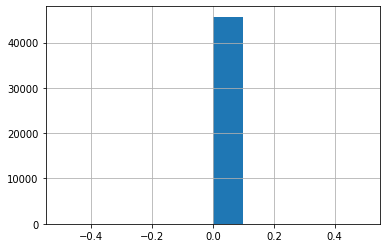

In [ ]:
df_2.isna().sum(axis=1).hist()

In [ ]:
df_2.isna().sum()

Internauta      0
ColL1TE_T09     0
EeccNac_T09     0
UsoL1_T09       0
Col_T08         0
               ..
IndRev_T03_T    0
IndRev_T02_R    0
IndRev_T02_T    0
IndRev_T01_R    0
IndRev_T01_T    0
Length: 107, dtype: int64

> Comprobamos mediante la función isna() que ya no hay MV.

In [ ]:
helper_2 = df_2.isna().sum().to_frame()
helper_2 = helper_2.rename({0:'values_f'}, axis=1)
helper_2.groupby(by="values_f").size()

values_f
0    107
dtype: int64

### Selección de límite de valor de correlación


> Se procederá con dos límites de valores absolutos de correlación: 0.1 y 0.2. Notar que no se debe hacer una nueva limpieza y preparación de datos para un límite más alto porque al considerar este mayor, se está tomando en cuenta un subconjunto de los datos con límite 0.1.

In [ ]:
lim_2 = 0.2
corr_value_exp = getCorr(corrdat['target'], lim_2)
corr_value_exp.shape

df_2_exp = df_2[corr_value_exp.index].copy()
df_2_exp.shape

FlgActCN_T04
ColL1TE_T04
FlgActCN_T03
ColL1TE_T03
FlgAct_T02
FlgActCN_T02
FlgActCN_T01
target


(45710, 8)

> Al subir el límite, ahora solo se consideran 8 columnas y por lo tanto 7 features.

## Normalización

In [ ]:
Q1 = df_2.quantile(0.25)
Q3 = df_2.quantile(0.75)
IQR = Q3 - Q1
((df_2 < (Q1 - 1.5 * IQR)) | (df_2 > (Q3 + 1.5 * IQR))).sum()

Internauta         0
ColL1TE_T09     7687
EeccNac_T09     4614
UsoL1_T09       4477
Col_T08         4245
                ... 
IndRev_T03_T    8843
IndRev_T02_R       0
IndRev_T02_T    9116
IndRev_T01_R       0
IndRev_T01_T    8203
Length: 107, dtype: int64

In [ ]:
Q1 = df_2_exp.quantile(0.25)
Q3 = df_2_exp.quantile(0.75)
IQR = Q3 - Q1
((df_2_exp < (Q1 - 1.5 * IQR)) | (df_2_exp > (Q3 + 1.5 * IQR))).sum()

FlgActCN_T04       0
ColL1TE_T04     6382
FlgActCN_T03       0
ColL1TE_T03     6285
FlgAct_T02         0
FlgActCN_T02       0
FlgActCN_T01       0
target          4340
dtype: int64

### Aplicando MinMaxScaler

> Debido a la distribución de outliers, se aplicará MinMax al dataset con límite 0.1, desde ahora dataset_01 y lo mismo al dataset con límite 0.2, desde ahora dataset_02

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df_2)
array_scaler = scaler.transform(df_2)

scaler_exp = MinMaxScaler()
scaler_exp.fit(df_2_exp)
array_scaler_exp = scaler_exp.transform(df_2_exp)

In [ ]:
df_3 = pd.DataFrame(array_scaler)
df_3.columns = df_2.columns
df_3.describe()

,Internauta,ColL1TE_T09,EeccNac_T09,UsoL1_T09,Col_T08,ColL1TE_T08,EeccNac_T08,UsoL1_T08,TxsDebAtm_T07,Col_T07,ColL1TE_T07,EeccNac_T07,UsoL1_T07,FlgAct_T06,FlgActCN_T06,FlgActCCPC_T06,Txs_T06,FacCN_T06,TxsCN_T06,TxsDebAtm_T06,Col_T06,ColL1TE_T06,EeccNac_T06,UsoL1_T06,FlgAct_T05,FlgActCN_T05,FlgActCCPC_T05,Txs_T05,FacCN_T05,TxsCN_T05,TxsCCPC_T05,TxsDebAtm_T05,Col_T05,ColL1TE_T05,EeccNac_T05,UsoL1_T05,FlgAct_T04,FlgActCN_T04,FlgActCCPC_T04,Fac_T04,...,Fac_T02,Txs_T02,FacCN_T02,TxsCN_T02,TxsCCPC_T02,TxsDebAtm_T02,ColL1TE_T02,ColL2T0_T02,EeccNac_T02,UsoL1_T02,FlgAct_T01,FlgActCN_T01,FlgActCCPC_T01,Fac_T01,Txs_T01,FacCN_T01,TxsCN_T01,TxsCCPC_T01,TxsDebAtm_T01,ColL1TE_T01,ColL2T0_T01,EeccNac_T01,UsoL1_T01,target,IndRev_T10_R,IndRev_T09_R,IndRev_T08_R,IndRev_T07_R,IndRev_T07_T,IndRev_T06_R,IndRev_T06_T,IndRev_T05_R,IndRev_T05_T,IndRev_T04_R,IndRev_T03_R,IndRev_T03_T,IndRev_T02_R,IndRev_T02_T,IndRev_T01_R,IndRev_T01_T
count,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,...,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.00000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000
mean,0.679632,0.020676,0.357769,0.356663,0.024192,0.019376,0.347370,0.345247,0.039815,0.025444,0.021504,0.565904,0.562949,0.692431,0.604944,0.286939,0.085831,0.121387,0.079723,0.041939,0.026966,0.022123,0.471955,0.385851,0.674623,0.576526,0.272851,0.061244,0.249084,0.053572,0.017252,0.042211,0.023474,0.022471,0.364318,0.360399,0.697309,0.611814,0.333384,0.069881,...,0.066544,0.053538,0.064689,0.063716,0.022501,0.044140,0.028437,0.015935,0.332633,0.361797,0.661584,0.571057,0.276767,0.044578,0.059442,0.060892,0.054322,0.022672,0.043954,0.028666,0.008470,0.323767,0.478035,0.094946,0.635331,0.656355,0.685036,0.712732,0.202866,0.706235,0.207066,0.741326,0.17867,0.769394,0.741763,0.193459,0.729250,0.199431,0.740232,0.179457
std,0.466623,0.051662,0.037151,0.036897,0.045451,0.047246,0.037796,0.037460,0.053309,0.045705,0.051998,0.025000,0.025180,0.461492,0.488868,0.452338,0.059887,0.027886,0.057447,0.057285,0.046196,0.051828,0.030157,0.034576,0.468521,0.494114,0.445430,0.064029,0.028216,0.060337,0.039954,0.057577,0.041804,0.050432,0.036332,0.036264,0.459428,0.487343,0.471428,0.030961,...,0.023024,0.043572,0.020436,0.054197,0.048804,0.060076,0.061796,0.036301,0.045703,0.043352,0.473176,0.494931,0.447405,0.031823,0.048152,0.040505,0.045743,0.051943,0.060228,0.061784,0.021135,0.046475,0.035863,0.293144,0.481342,0.474929,0.464507,0.452492,0.402138,0.455491,0.405208,0.437911,0.38308,0.421225,0.437670,0.395014,0.444352,0.399577,0.438512,0.383739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [ ]:
df_3_exp = pd.DataFrame(array_scaler_exp)
df_3_exp.columns = df_2_exp.columns
df_3_exp.describe()

,FlgActCN_T04,ColL1TE_T04,FlgActCN_T03,ColL1TE_T03,FlgAct_T02,FlgActCN_T02,FlgActCN_T01,target
count,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000,45710.000000
mean,0.611814,0.022411,0.617370,0.029228,0.693349,0.603828,0.571057,0.094946
std,0.487343,0.048748,0.486034,0.062610,0.461108,0.489106,0.494931,0.293144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000123,1.000000,0.000174,1.000000,1.000000,1.000000,0.000000
75%,1.000000,0.021369,1.000000,0.028707,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Fase IV. Modeling**



Con el fin de encontrar variados modelos con distintas configuraciones
se ha separado el dataset en 2, generando las siguientes configuraciones:






> **Primer dataset(df_3 con límite de correlación: 0.1)**



**(X_train, X_test, Y_train, Y_test)**

Porcentaje de entrenamiento: 70% - Porcentaje de testeo: 30%

**(X_train_2, X_test_2, Y_train_2, Y_test_2)**

Porcentaje de entrenamiento: 80% - Porcentaje de testeo: 20%



> **Segundo dataset(df_3_exp límite de correlación: 0.2)**



**(X_train_exp, X_test_exp, Y_train_exp, Y_test_exp)**

Porcentaje de entrenamiento: 70% - Porcentaje de testeo: 30%

**(X_train_2_exp, X_test_2_exp, Y_train_2_exp, Y_test_2_exp)**

Porcentaje de entrenamiento: 80% - Porcentaje de testeo: 20%

A nuestro primer dataset (*df_3*) le asignamos un límite de correlación de 0.1, tomando un total de 106 columnas. Al ver que quedó bastante bien y listo para ser modelado nos surgió una pregunta: **¿Habrán diferencias entre los modelos al subir el límite de correlación y a su vez usar menos columnas?** Por lo que quisimos ver qué es lo que sucedía y es por esto que dividimos el dataset en dos, dejando un set de datos con el limite de correlación de 0.1 y el otro (*df_3_exp*) con un límite de correlación de 0.2 y usando solamente 7 features.

Luego en la fase de evaluación reconoceremos mediante métricas con qué configuración y en qué dataset se obtuvieron los mejores resultados.

In [ ]:
X = df_3.drop(['target'], axis=1)
Y = df_3.target.copy()

X_exp = df_3_exp.drop(['target'], axis=1)
Y_exp = df_3_exp.target.copy()



> Separamos la data.



In [ ]:
#Dejamos un 80% para entrenamiento y un 20% para el testeo
train_size = 0.80
test_size = 1 - train_size
random_state = 40
CV = 10
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=random_state)
metricas = []

#Dejamos otra separación con un 70% para entrenamiento y un 30% para el testeo
train_size_2 = 0.70
test_size_2 = 1 - train_size
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X, Y, train_size=train_size_2, random_state=random_state)
metricas_2 = []



#Realizamos la misma separación para el dataset_02
X_train_exp, X_test_exp, Y_train_exp, Y_test_exp = train_test_split(X_exp, Y_exp, train_size=train_size, random_state=random_state)
metricas_exp = []

#Dejamos otra separación con un 70% para entrenamiento y un 30% para el testeo
train_size_2 = 0.70
test_size_2 = 1 - train_size
#random_state_2 = 40
#CV = 10
X_train_2_exp, X_test_2_exp, Y_train_2_exp, Y_test_2_exp = train_test_split(X_exp, Y_exp, train_size=train_size_2, random_state=random_state)
metricas_2_exp = []

In [ ]:
df_3[["target"]].groupby(by=["target"]).size()

target
0.0    41370
1.0     4340
dtype: int64

In [ ]:
df_3_exp[["target"]].groupby(by=["target"]).size()

target
0.0    41370
1.0     4340
dtype: int64

**Aquí vemos un desbalanceo de la data, ya que hay más filas que incluyen la opción 0 en su columna 'target', esto puede ocasionar algunos problemas como veremos a continuación, sin embargo también podría ser tomado como ventaja**

## Árboles de clasificacion

In [ ]:
#Árbol 1
clf_arbol = DecisionTreeClassifier(random_state=random_state)
clf_arbol = clf_arbol.fit(X_train,Y_train)  
#Árbol 2
clf_arbol_2 = DecisionTreeClassifier(random_state=random_state)
clf_arbol_2 = clf_arbol_2.fit(X_train_2,Y_train_2)

#Árbol Exp
clf_arbol_exp = DecisionTreeClassifier(random_state=random_state)
clf_arbol_exp = clf_arbol_exp.fit(X_train_exp,Y_train_exp)
#Árbol Exp 2
clf_arbol_2_exp = DecisionTreeClassifier(random_state=random_state)
clf_arbol_2_exp = clf_arbol_2_exp.fit(X_train_2_exp,Y_train_2_exp)

In [ ]:
#Árbol 1
y_pred_arbol = clf_arbol.predict(X_test)
#Árbol 2
y_pred_arbol_2 = clf_arbol.predict(X_test_2)

#Árbol Exp
y_pred_arbol_exp = clf_arbol_exp.predict(X_test_exp)
#Árbol Exp 2
y_pred_arbol_2_exp = clf_arbol_exp.predict(X_test_2_exp)

In [ ]:
print(cross_val_score(clf_arbol, X_train, Y_train, cv=10).mean())
print(cross_val_score(clf_arbol_2, X_train_2, Y_train_2, cv=10).mean())

0.8808796071082167
0.8810480618943419


In [ ]:
print(cross_val_score(clf_arbol_exp, X_train_exp, Y_train_exp, cv=10).mean())
print(cross_val_score(clf_arbol_2_exp, X_train_2_exp, Y_train_2_exp, cv=10).mean())

0.8736600590336927
0.874390258674586


**Estos resultados son meramente iniciales, posteriormente se les dará análisis. Es importante notar que para el dataset_01, el puntaje por CV tomó 41 segundos en calcular. Para el dataset_02, solo 1, y con solo una diferencia de score de 0.01 +-.**

## Árbol con gridsearchCV

In [ ]:
param_grid_arbol = {'max_depth': range(3,8),
              'min_samples_split': range(2,10),
              #'min_samples_leaf':['scale', 'auto']
              }

In [ ]:
clf_arbol_GSCV = DecisionTreeClassifier(random_state=random_state)
grid_arbol_GSCV = GridSearchCV(clf_arbol_GSCV, param_grid_arbol, n_jobs=-1)
clf_arbol_GSCV_2 = DecisionTreeClassifier(random_state=random_state)
grid_arbol_GSCV_2 = GridSearchCV(clf_arbol_GSCV_2, param_grid_arbol, n_jobs=-1)

In [ ]:
clf_arbol_GSCV_exp = DecisionTreeClassifier(random_state=random_state)
grid_arbol_GSCV_exp = GridSearchCV(clf_arbol_GSCV_exp, param_grid_arbol, n_jobs=-1)
clf_arbol_GSCV_2_exp = DecisionTreeClassifier(random_state=random_state)
grid_arbol_GSCV_2_exp = GridSearchCV(clf_arbol_GSCV_2_exp, param_grid_arbol, n_jobs=-1)

In [ ]:
grid_arbol_GSCV.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=40), n_jobs=-1,
             param_grid={'max_depth': range(3, 8),
                         'min_samples_split': range(2, 10)})

In [ ]:
grid_arbol_GSCV_2.fit(X_train_2, Y_train_2)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=40), n_jobs=-1,
             param_grid={'max_depth': range(3, 8),
                         'min_samples_split': range(2, 10)})

In [ ]:
grid_arbol_GSCV_exp.fit(X_train_exp, Y_train_exp)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=40), n_jobs=-1,
             param_grid={'max_depth': range(3, 8),
                         'min_samples_split': range(2, 10)})

In [ ]:
grid_arbol_GSCV_2_exp.fit(X_train_2_exp, Y_train_2_exp)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=40), n_jobs=-1,
             param_grid={'max_depth': range(3, 8),
                         'min_samples_split': range(2, 10)})

In [ ]:
print("Para dataset_01:")
print("Mejores parámetros para 80-20 y puntaje:")
print(grid_arbol_GSCV.best_params_)
print(grid_arbol_GSCV.best_score_)
print("############################")
print("Mejores parámetros para 70-30 y puntaje:")
print(grid_arbol_GSCV_2.best_params_)
print(grid_arbol_GSCV_2.best_score_)

Para dataset_01:
Mejores parámetros para 80-20 y puntaje:
{'max_depth': 6, 'min_samples_split': 3}
0.9141052297254513
############################
Mejores parámetros para 70-30 y puntaje:
{'max_depth': 6, 'min_samples_split': 4}
0.9121764728863884


In [ ]:
print("Para dataset_02:")
print("Mejores parámetros para 80-20 y puntaje:")
print(grid_arbol_GSCV_exp.best_params_)
print(grid_arbol_GSCV_exp.best_score_)
print("############################")
print("Mejores parámetros para 70-30 y puntaje:")
print(grid_arbol_GSCV_2_exp.best_params_)
print(grid_arbol_GSCV_2_exp.best_score_)

Para dataset_02:
Mejores parámetros para 80-20 y puntaje:
{'max_depth': 6, 'min_samples_split': 2}
0.90721401023892
############################
Mejores parámetros para 70-30 y puntaje:
{'max_depth': 6, 'min_samples_split': 9}
0.9074571222065948


> El orden de tiempo de tiempo pasó de 2 minutos a menos de 10 segundos sin pérdidas importantes en el score.

In [ ]:
grid_arbol_GSCV_predictions = grid_arbol_GSCV.predict(X_test)

grid_arbol_GSCV_predictions_2 = grid_arbol_GSCV_2.predict(X_test_2)

In [ ]:
grid_arbol_GSCV_predictions_exp = grid_arbol_GSCV_exp.predict(X_test_exp)

grid_arbol_GSCV_predictions_2_exp = grid_arbol_GSCV_2_exp.predict(X_test_2_exp)

## SVC

In [ ]:
param_grid_svc = {'kernel':['linear', 'poly', 'rbf'],
                  'degree':[3,4]
                  }

In [ ]:
clf_svc_GSCV = SVC(random_state=random_state)
grid_svc_GSCV = GridSearchCV(clf_svc_GSCV, param_grid_svc, n_jobs=-1)

clf_svc_GSCV_2 = SVC(random_state=random_state)
grid_svc_GSCV_2 = GridSearchCV(clf_svc_GSCV_2, param_grid_svc, n_jobs=-1)

In [ ]:
clf_svc_GSCV_exp = SVC(random_state=random_state)
grid_svc_GSCV_exp = GridSearchCV(clf_svc_GSCV_exp, param_grid_svc, n_jobs=-1, verbose=5)

clf_svc_GSCV_2_exp = SVC(random_state=random_state)
grid_svc_GSCV_2_exp = GridSearchCV(clf_svc_GSCV_2_exp, param_grid_svc, n_jobs=-1, verbose=5)

In [ ]:
grid_svc_GSCV.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(random_state=40), n_jobs=-1,
             param_grid={'degree': [3, 4], 'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
grid_svc_GSCV_2.fit(X_train_2, Y_train_2)

GridSearchCV(estimator=SVC(random_state=40), n_jobs=-1,
             param_grid={'degree': [3, 4], 'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
#from sklearn import preprocessing
#grid_svc_GSCV_exp.fit(X_train_exp, Y_train_exp)

In [ ]:
grid_svc_GSCV_2_exp.fit(X_train_2_exp, Y_train_2_exp)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=SVC(random_state=40), n_jobs=-1,
             param_grid={'degree': [3, 4], 'kernel': ['linear', 'poly', 'rbf']},
             verbose=5)

In [ ]:
print("Para dataset_01")
print("Mejores parámetros para 80-20 y puntaje:")
print(grid_svc_GSCV.best_params_)
print(grid_svc_GSCV.best_score_)
print("############################")
print("Mejores parámetros para 70-30 y puntaje:")
print(grid_svc_GSCV_2.best_params_)
print(grid_svc_GSCV_2.best_score_)

Para dataset_01
Mejores parámetros para 80-20 y puntaje:
{'degree': 3, 'kernel': 'poly'}
0.9164570860041085
############################
Mejores parámetros para 70-30 y puntaje:
{'degree': 4, 'kernel': 'poly'}
0.916989588216909


In [ ]:
print("Para dataset_02")
print("Mejores parámetros para 80-20 y puntaje:")
#print(grid_svc_GSCV_exp.best_params_)
#print(grid_svc_GSCV_exp.best_score_)
print("############################")
print("Mejores parámetros para 70-30 y puntaje:")
print(grid_svc_GSCV_2_exp.best_params_)
print(grid_svc_GSCV_2_exp.best_score_)

Para dataset_02
Mejores parámetros para 80-20 y puntaje:
############################
Mejores parámetros para 70-30 y puntaje:
{'degree': 3, 'kernel': 'rbf'}
0.905956965932177


In [ ]:
grid_svc_GSCV_predictions = grid_svc_GSCV.predict(X_test)

grid_svc_GSCV_predictions_2 = grid_svc_GSCV_2.predict(X_test_2)

In [ ]:
#grid_svc_GSCV_predictions_exp = grid_svc_GSCV.predict(X_test_exp)

grid_svc_GSCV_predictions_2_exp = grid_svc_GSCV_2_exp.predict(X_test_2_exp)

> Notablemente, al utilizar SVC, se logra llegar a un modelo con parámetros específicos para el dataset_01 en ambos casos, pero para el dataset_02 con training set de 70, el tiempo de ejecución se desborda (más de 50 minutos y no llegó a conclusión, en comparación a los 10 minutos +- de los demás).En score, los modelos de dataset_01 y dataset_02 son similares pero el tiempo tomado para el último bajó de 10+ minutos a 4 minutos.

## KNeighborsClassifier

In [ ]:
param_grid_KNC = {'n_neighbors':[2,5,7,10],
                  'weights':['uniform','distance']
              }

In [ ]:
clf_KNC_GSCV = KNeighborsClassifier()
grid_KNC_GSCV = GridSearchCV(clf_KNC_GSCV, param_grid_KNC, n_jobs=-1)

clf_KNC_GSCV_2 = KNeighborsClassifier()
grid_KNC_GSCV_2 = GridSearchCV(clf_KNC_GSCV_2, param_grid_KNC, n_jobs=-1)

In [ ]:
clf_KNC_GSCV_exp = KNeighborsClassifier()
grid_KNC_GSCV_exp = GridSearchCV(clf_KNC_GSCV_exp, param_grid_KNC, n_jobs=-1)

clf_KNC_GSCV_2_exp = KNeighborsClassifier()
grid_KNC_GSCV_2_exp = GridSearchCV(clf_KNC_GSCV_2_exp, param_grid_KNC, n_jobs=-1)

In [ ]:
grid_KNC_GSCV.fit(X_train, Y_train)

grid_KNC_GSCV_2.fit(X_train_2, Y_train_2)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 5, 7, 10],
                         'weights': ['uniform', 'distance']})

In [ ]:
grid_KNC_GSCV_exp.fit(X_train_exp, Y_train_exp)

grid_KNC_GSCV_2_exp.fit(X_train_2_exp, Y_train_2_exp)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 5, 7, 10],
                         'weights': ['uniform', 'distance']})

In [ ]:
print("Para dataset_01:")
print("Mejores parámetros para 80-20 y puntaje:")
print(grid_KNC_GSCV.best_params_)
print(grid_KNC_GSCV.best_score_)
print("############################")
print("Mejores parámetros para 70-30 y puntaje:")
print(grid_KNC_GSCV_2.best_params_)
print(grid_KNC_GSCV_2.best_score_)

Para dataset_01:
Mejores parámetros para 80-20 y puntaje:
{'n_neighbors': 10, 'weights': 'uniform'}
0.9123003969429593
############################
Mejores parámetros para 70-30 y puntaje:
{'n_neighbors': 10, 'weights': 'uniform'}
0.912020227769964


In [ ]:
print("Para dataset_02:")
print("Mejores parámetros para 80-20 y puntaje:")
print(grid_KNC_GSCV_exp.best_params_)
print(grid_KNC_GSCV_exp.best_score_)
print("############################")
print("Mejores parámetros para 70-30 y puntaje:")
print(grid_KNC_GSCV_2_exp.best_params_)
print(grid_KNC_GSCV_2_exp.best_score_)

Para dataset_02:
Mejores parámetros para 80-20 y puntaje:
{'n_neighbors': 10, 'weights': 'uniform'}
0.906995203083978
############################
Mejores parámetros para 70-30 y puntaje:
{'n_neighbors': 10, 'weights': 'uniform'}
0.9064883526722924


> Diferencia de 4 minutos a 44 segundos en entrenamiento sin pérdidas relevantes en score.

In [ ]:
grid_KNC_GSCV_predictions = grid_KNC_GSCV.predict(X_test)

grid_KNC_GSCV_predictions_2 = grid_KNC_GSCV.predict(X_test_2)

In [ ]:
grid_KNC_GSCV_predictions_exp = grid_KNC_GSCV_exp.predict(X_test_exp)

grid_KNC_GSCV_predictions_2_exp = grid_KNC_GSCV_2_exp.predict(X_test_2_exp)

## RandomForestClassifier

In [ ]:
param_grid_RFC = {'n_estimators':[100, 250, 500],
                  'criterion':['gini', 'entropy'],
                  'max_depth':[4,5,6]
              }

In [ ]:
clf_RFC_GSCV = RandomForestClassifier(random_state=random_state)
grid_RFC_GSCV = GridSearchCV(clf_RFC_GSCV, param_grid_RFC, n_jobs=-1)

clf_RFC_GSCV_2 = RandomForestClassifier(random_state=random_state)
grid_RFC_GSCV_2 = GridSearchCV(clf_RFC_GSCV_2, param_grid_RFC, n_jobs=-1)

In [ ]:
clf_RFC_GSCV_exp = RandomForestClassifier(random_state=random_state)
grid_RFC_GSCV_exp = GridSearchCV(clf_RFC_GSCV_exp, param_grid_RFC, n_jobs=-1)

clf_RFC_GSCV_2_exp = RandomForestClassifier(random_state=random_state)
grid_RFC_GSCV_2_exp = GridSearchCV(clf_RFC_GSCV_2_exp, param_grid_RFC, n_jobs=-1)

In [ ]:
grid_RFC_GSCV.fit(X_train, Y_train)

grid_RFC_GSCV_2.fit(X_train_2, Y_train_2)

GridSearchCV(estimator=RandomForestClassifier(random_state=40), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [100, 250, 500]})

In [ ]:
grid_RFC_GSCV_exp.fit(X_train_exp, Y_train_exp)

grid_RFC_GSCV_2_exp.fit(X_train_2_exp, Y_train_2_exp)

GridSearchCV(estimator=RandomForestClassifier(random_state=40), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [100, 250, 500]})

In [ ]:
print("Para dataset_01")
print("Mejores parámetros para 80-20 y puntaje:")
print(grid_RFC_GSCV.best_params_)
print(grid_RFC_GSCV.best_score_)
print("############################")
print("Mejores parámetros para 70-30 y puntaje:")
print(grid_RFC_GSCV_2.best_params_)
print(grid_RFC_GSCV_2.best_score_)

Para dataset_01
Mejores parámetros para 80-20 y puntaje:
{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 500}
0.9149530050900697
############################
Mejores parámetros para 70-30 y puntaje:
{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 500}
0.9151143586888576


In [ ]:
print("Para dataset_02")
print("Mejores parámetros para 80-20 y puntaje:")
print(grid_RFC_GSCV_exp.best_params_)
print(grid_RFC_GSCV_exp.best_score_)
print("############################")
print("Mejores parámetros para 70-30 y puntaje:")
print(grid_RFC_GSCV_2_exp.best_params_)
print(grid_RFC_GSCV_2_exp.best_score_)

Para dataset_02
Mejores parámetros para 80-20 y puntaje:
{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 250}
0.9075694517436874
############################
Mejores parámetros para 70-30 y puntaje:
{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}
0.9071133624394436


> Para el dataset_01, los modelos tomaron 45 minutos (35 y 10 minutos cada uno, aproximadamente, siendo el de 10 minutos la separación 70 - 30). Para ambos modelos de dataset_02, tomó 8 minutos. Sus scores son similares.

In [ ]:
grid_RFC_GSCV_predictions = grid_RFC_GSCV.predict(X_test)

grid_RFC_GSCV_predictions_2 = grid_RFC_GSCV_2.predict(X_test_2)

In [ ]:
grid_RFC_GSCV_predictions_exp = grid_RFC_GSCV_exp.predict(X_test_exp)

grid_RFC_GSCV_predictions_2_exp = grid_RFC_GSCV_2_exp.predict(X_test_2_exp)

# **Fase V. Evaluation.**

### Métricas

#### Métricas de Árbol de clasificación

#####Árbol 1

In [ ]:
print(confusion_matrix(Y_test, y_pred_arbol))
print(classification_report(Y_test, y_pred_arbol))
auc_score_arbol_1 = roc_auc_score(Y_test, y_pred_arbol)
print('AUC score: ', auc_score_arbol_1)

[[7642  627]
 [ 503  370]]
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      8269
         1.0       0.37      0.42      0.40       873

    accuracy                           0.88      9142
   macro avg       0.65      0.67      0.66      9142
weighted avg       0.88      0.88      0.88      9142

AUC score:  0.6740002579362854


Porcentaje de entrenamiento 80%
Porcentaje de testeo 20%
Límite de correlación 0.1

**Comenzamos con el primer Árbol, el cual contempla un 80% de training set y un 20% de test, vemos muy buenos valores en la clasificación 0, sin embargo son bastante bajos los parametros en clasificación 1. Esto quizás se pueda arreglar modificando los porcentajes de training y test, como veremos a continuación.**

#####Arbol 2

In [ ]:
print(confusion_matrix(Y_test_2, y_pred_arbol_2))
print(classification_report(Y_test_2, y_pred_arbol_2))
auc_score_arbol_2 = roc_auc_score(Y_test_2, y_pred_arbol_2)
print('AUC score: ', auc_score_arbol_2)

[[11762   627]
 [  503   822]]
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95     12389
         1.0       0.57      0.62      0.59      1325

    accuracy                           0.92     13714
   macro avg       0.76      0.78      0.77     13714
weighted avg       0.92      0.92      0.92     13714

AUC score:  0.784883973457891


Porcentaje de entrenamiento 70%
Porcentaje de testeo 30%
Límite de correlación 0.1

**Continuamos con el Árbol de clasificación número 2, el cual contempla un 70% de training set y un 30% de test, con un límite de correlación en 0.1. Los resultados son muy buenos ya que subió todos los parámetros en comparación con el Árbol anterior.**

##### Árbol Exp

In [ ]:
print(confusion_matrix(Y_test_exp, y_pred_arbol_exp))
print(classification_report(Y_test_exp, y_pred_arbol_exp))
auc_score_arbol_exp = roc_auc_score(Y_test_exp, y_pred_arbol_exp)
print('AUC score: ', auc_score_arbol_exp)

[[7756  513]
 [ 591  282]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      8269
         1.0       0.35      0.32      0.34       873

    accuracy                           0.88      9142
   macro avg       0.64      0.63      0.64      9142
weighted avg       0.87      0.88      0.88      9142

AUC score:  0.6304925571806096


Porcentaje de entrenamiento 80%
Porcentaje de testeo 20%
Límite de correlación 0.2

**Al cambiar los parámetros del árbol tomando como límite de correlación 0.2 y por lo tanto 7 features se tiene una disminución del rendimiento general respecto al modelo Arbol 2**

##### Árbol Exp 2

In [ ]:
print(confusion_matrix(Y_test_2_exp, y_pred_arbol_2_exp))
print(classification_report(Y_test_2_exp, y_pred_arbol_2_exp))
auc_score_arbol_2_exp = roc_auc_score(Y_test_2_exp, y_pred_arbol_2_exp)
print('AUC score: ', auc_score_arbol_2_exp)

[[11876   513]
 [  650   675]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     12389
         1.0       0.57      0.51      0.54      1325

    accuracy                           0.92     13714
   macro avg       0.76      0.73      0.75     13714
weighted avg       0.91      0.92      0.91     13714

AUC score:  0.7340131309423912


Porcentaje de entrenamiento 70%
Porcentaje de testeo 30%
Límite de correlación 0.2

#### Análisis Árbol de clasificación

**...**

#### Métricas de Árbol con gridsearchCV

##### GSCV

In [ ]:
print(classification_report(Y_test, grid_arbol_GSCV_predictions))
auc_score_arbol_GSCV = roc_auc_score(Y_test, grid_arbol_GSCV_predictions)
print('AUC score: ', auc_score_arbol_GSCV)

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      8269
         1.0       0.63      0.30      0.41       873

    accuracy                           0.92      9142
   macro avg       0.78      0.64      0.68      9142
weighted avg       0.90      0.92      0.90      9142

AUC score:  0.6408058527987265


Porcentaje de entrenamiento 80%
Porcentaje de testeo 20%
Límite de correlación 0.1

##### GSCV 2

In [ ]:
print(classification_report(Y_test_2, grid_arbol_GSCV_predictions_2))
auc_score_arbol_GSCV_2 = roc_auc_score(Y_test_2, grid_arbol_GSCV_predictions_2)
print('AUC score: ', auc_score_arbol_GSCV_2)

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     12389
         1.0       0.61      0.33      0.43      1325

    accuracy                           0.91     13714
   macro avg       0.77      0.65      0.69     13714
weighted avg       0.90      0.91      0.90     13714

AUC score:  0.6541985967466575


Porcentaje de entrenamiento 70%
Porcentaje de testeo 30%
Límite de correlación 0.1

##### GSCV Exp

In [ ]:
print(classification_report(Y_test_exp, grid_arbol_GSCV_predictions_exp))
auc_score_arbol_GSCV_exp = roc_auc_score(Y_test, grid_arbol_GSCV_predictions_exp)
print('AUC score: ', auc_score_arbol_GSCV_exp)

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      8269
         1.0       0.52      0.33      0.41       873

    accuracy                           0.91      9142
   macro avg       0.73      0.65      0.68      9142
weighted avg       0.89      0.91      0.90      9142

AUC score:  0.6510947677582968


Porcentaje de entrenamiento 80%
Porcentaje de testeo 20%
Límite de correlación 0.2

##### GSCV Exp 2

In [ ]:
print(classification_report(Y_test_2_exp, grid_arbol_GSCV_predictions_2_exp))
auc_score_arbol_GSCV_2_exp = roc_auc_score(Y_test_2_exp, grid_arbol_GSCV_predictions_2_exp)
print('AUC score: ', auc_score_arbol_GSCV_2_exp)

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     12389
         1.0       0.53      0.32      0.40      1325

    accuracy                           0.91     13714
   macro avg       0.73      0.65      0.67     13714
weighted avg       0.89      0.91      0.90     13714

AUC score:  0.6454185316554399


Porcentaje de entrenamiento 70%
Porcentaje de testeo 30%
Límite de correlación 0.2

#### Análisis GridSearchCV

**Para todos los modelos encontrados con GridSearchCV, ninguno supera ni iguala al modelo Arbol 2 ni al modelo Arbol exp 2**

#### Métricas de SVC

##### SVC 1

In [ ]:
print(classification_report(Y_test, grid_svc_GSCV_predictions))
auc_score_svc_GSCV = roc_auc_score(Y_test, grid_svc_GSCV_predictions)
print('AUC score: ', auc_score_svc_GSCV)

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      8269
         1.0       0.67      0.28      0.39       873

    accuracy                           0.92      9142
   macro avg       0.80      0.63      0.67      9142
weighted avg       0.90      0.92      0.90      9142

AUC score:  0.6308946995201581


Porcentaje de entrenamiento 80%
Porcentaje de testeo 20%
Límite de correlación 0.1

##### SVC 2

In [ ]:
print(classification_report(Y_test_2, grid_svc_GSCV_predictions_2))
auc_score_svc_GSCV_2 = roc_auc_score(Y_test_2, grid_svc_GSCV_predictions_2)
print('AUC score: ', auc_score_svc_GSCV_2)

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96     12389
         1.0       0.65      0.29      0.40      1325

    accuracy                           0.92     13714
   macro avg       0.79      0.64      0.68     13714
weighted avg       0.90      0.92      0.90     13714

AUC score:  0.63742726734154


Porcentaje de entrenamiento 70%
Porcentaje de testeo 30%
Límite de correlación 0.1

##### SVC Exp (Deprecado)

In [ ]:
#print(classification_report(Y_test_exp, grid_svc_GSCV_predictions_exp))

Porcentaje de entrenamiento 80%
Porcentaje de testeo 20%
Límite de correlación 0.2

##### SVC Exp 2 

In [ ]:
print(classification_report(Y_test_2_exp, grid_svc_GSCV_predictions_2_exp))
auc_score_svc_GSCV_2_exp = roc_auc_score(Y_test_2, grid_svc_GSCV_predictions_2_exp)
print('AUC score: ', auc_score_svc_GSCV_2_exp)

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     12389
         1.0       0.60      0.03      0.06      1325

    accuracy                           0.90     13714
   macro avg       0.75      0.51      0.50     13714
weighted avg       0.88      0.90      0.86     13714

AUC score:  0.5143820217874348


Porcentaje de entrenamiento 70%
Porcentaje de testeo 30%
Límite de correlación 0.2

#### Análisis SVC

**Ninguno de los modelos entrenados con SVC logra el mismo nivel de acierto que Árbol 2 o Árbol exp 2**

#### Métricas de KNeighborsClassifier

#####KNeighborsClassifier 1

In [ ]:
print(classification_report(Y_test, grid_KNC_GSCV_predictions))
auc_score_KNC_GSCV = roc_auc_score(Y_test, grid_KNC_GSCV_predictions)
print('AUC score: ', auc_score_KNC_GSCV)

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      8269
         1.0       0.60      0.32      0.41       873

    accuracy                           0.91      9142
   macro avg       0.77      0.65      0.68      9142
weighted avg       0.90      0.91      0.90      9142

AUC score:  0.6463769718030757


Porcentaje de entrenamiento 80%
Porcentaje de testeo 20%
Límite de correlación 0.1

#####KNeighborsClassifier 2

In [ ]:
print(classification_report(Y_test_2, grid_KNC_GSCV_predictions_2))
auc_score_KNC_GSCV_2 = roc_auc_score(Y_test_2, grid_KNC_GSCV_predictions_2)
print('AUC score: ', auc_score_KNC_GSCV_2)

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96     12389
         1.0       0.64      0.34      0.44      1325

    accuracy                           0.92     13714
   macro avg       0.78      0.66      0.70     13714
weighted avg       0.90      0.92      0.91     13714

AUC score:  0.6579701408888287


Porcentaje de entrenamiento 70%
Porcentaje de testeo 30%
Límite de correlación 0.1

#####KNeighborsClassifier Exp

In [ ]:
print(classification_report(Y_test_exp, grid_KNC_GSCV_predictions_exp))
auc_score_KNC_GSCV_exp = roc_auc_score(Y_test_exp, grid_KNC_GSCV_predictions_exp)
print('AUC score: ', auc_score_KNC_GSCV_exp)

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      8269
         1.0       0.56      0.21      0.31       873

    accuracy                           0.91      9142
   macro avg       0.74      0.60      0.63      9142
weighted avg       0.89      0.91      0.89      9142

AUC score:  0.5981528603568691


Porcentaje de entrenamiento 80%
Porcentaje de testeo 20%
Límite de correlación 0.2

##### KNeighborsClassifier Exp 2


In [ ]:
print(classification_report(Y_test_2_exp, grid_KNC_GSCV_predictions_2_exp))
auc_score_KNC_GSCV_2_exp = roc_auc_score(Y_test_2_exp, grid_KNC_GSCV_predictions_2_exp)
print('AUC score: ', auc_score_KNC_GSCV_2_exp)

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     12389
         1.0       0.56      0.21      0.30      1325

    accuracy                           0.91     13714
   macro avg       0.74      0.59      0.63     13714
weighted avg       0.89      0.91      0.89     13714

AUC score:  0.5948806077210916


Porcentaje de entrenamiento 70%
Porcentaje de testeo 30%
Límite de correlación 0.2

#### Análisis KNeighborsClassifier

**Ninguno de los modelos entrenados bajo KNeighboursClassifier logra resultados comprables a Arbol 2 ni Arbol 2 exp, todos son menores**

#### Métricas de RandomForestClassifier

##### RandomForestClassifier 

In [ ]:
print(classification_report(Y_test, grid_RFC_GSCV_predictions))
auc_score_RFC_GSCV = roc_auc_score(Y_test, grid_RFC_GSCV_predictions)
print('AUC score: ', auc_score_RFC_GSCV)

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      8269
         1.0       0.74      0.20      0.31       873

    accuracy                           0.92      9142
   macro avg       0.83      0.59      0.63      9142
weighted avg       0.90      0.92      0.89      9142

AUC score:  0.5948224069888266


Porcentaje de entrenamiento 80%
Porcentaje de testeo 20%
Límite de correlación 0.1

##### RandomForestClassifier 2

In [ ]:
print(classification_report(Y_test_2, grid_RFC_GSCV_predictions_2))
auc_score_RFC_GSCV_2 = roc_auc_score(Y_test_2, grid_RFC_GSCV_predictions_2)
print('AUC score: ', auc_score_RFC_GSCV_2)

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     12389
         1.0       0.74      0.20      0.31      1325

    accuracy                           0.92     13714
   macro avg       0.83      0.59      0.63     13714
weighted avg       0.90      0.92      0.89     13714

AUC score:  0.5946968780887489


Porcentaje de entrenamiento 70%
Porcentaje de testeo 30%
Límite de correlación 0.1

##### RandomForestClassifier Exp

In [ ]:
print(classification_report(Y_test_exp, grid_RFC_GSCV_predictions_exp))
auc_score_RFC_GSCV_exp = roc_auc_score(Y_test_exp, grid_RFC_GSCV_predictions_exp)
print('AUC score: ', auc_score_RFC_GSCV_exp)

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      8269
         1.0       0.56      0.14      0.22       873

    accuracy                           0.91      9142
   macro avg       0.74      0.56      0.59      9142
weighted avg       0.88      0.91      0.88      9142

AUC score:  0.562984175982918


Porcentaje de entrenamiento 80%
Porcentaje de testeo 20%
Límite de correlación 0.2

##### RandomForestClassifier Exp 2

In [ ]:
print(classification_report(Y_test_2_exp, grid_RFC_GSCV_predictions_2_exp))
auc_score_RFC_GSCV_2_exp = roc_auc_score(Y_test_2, grid_RFC_GSCV_predictions_2_exp)
print('AUC score: ', auc_score_RFC_GSCV_2_exp)

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     12389
         1.0       0.56      0.14      0.23      1325

    accuracy                           0.91     13714
   macro avg       0.74      0.57      0.59     13714
weighted avg       0.88      0.91      0.88     13714

AUC score:  0.5659813559502724


Porcentaje de entrenamiento 70%
Porcentaje de testeo 30%
Límite de correlación 0.2

#### Análisis RandomForestClassifier

**De todos los modelos entrenados bajo RandomForestClassifier, ninguno presenta mejores métricas que Arbol 2 ni que Arbol 2 exp**

### Análisis final

**Gracias al estudio y procesamiento de esta data, se pudieron obtener resultados más que satisfactorios, no así con nuestro objetivo anterior, ya que la desición de cambiar de objetivo fue efectivamente por malos resultados y debido a esto descubrimos un target que si tenía correlación con la data y en consecuencia buenos modelados y predicciones, obteniendo nuestros mejores resultados en el Árbol de clasificación número 2, donde la separación de la data era de un 70% para el entrenamiento y un 30% para el testeo y se usó un límite de correlación de 0.1. En cuanto a métricas, este modelo es ligeramente mejor que el modelo Arbol 2 exp (df_3_exp, límite de correlación de 0.2), pero definimos al primero como ideal para este negocio debido a la importancia de obtener resultados certeros, sin  cuidado de el tiempo de entrenamiento.**

**El objetivo inicial se pudo llevar a cabo y predecir con gran probabilidad, pudiendo así el banco Dormammu saber cuales clientes del recientemente adquirido banco Monopoly serán los que quedarán con deuda y cuales clientes pagarán la deuda total.**

In [ ]:
print(confusion_matrix(Y_test_2, y_pred_arbol_2))
print(classification_report(Y_test_2, y_pred_arbol_2))
auc_score_arbol_2 = roc_auc_score(Y_test_2, y_pred_arbol_2)
print('AUC score: ', auc_score_arbol_2)

[[11762   627]
 [  503   822]]
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95     12389
         1.0       0.57      0.62      0.59      1325

    accuracy                           0.92     13714
   macro avg       0.76      0.78      0.77     13714
weighted avg       0.92      0.92      0.92     13714

AUC score:  0.784883973457891


**El valor de recall en 0.62 es aceptable debido a que el objetivo del negocio es detectar a los clientes que no quedarán con deuda para su próximo pago, dando preferencia a lás métricas relacionadas a la clase "0.0", teniendo 0.96 de precision, 0.95 de recall y 0.92 de accuracy**